<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%978_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акцій у кожний момент часу дорівнює
x
∼
Γ
(
0.3
,
1.1
)
x∼Γ(0.3,1.1), де
Г
Г — позначення гамма-розподілу.



Необхідно запустити симуляцію
n
=
100
n=100 разів для різних значень часу
t
t.

а) Побудуй гістограму розподілу
x
x.

б) Запусти симуляцію з
t
t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.

t=1: mean=0.279, std=0.527, p=0.000


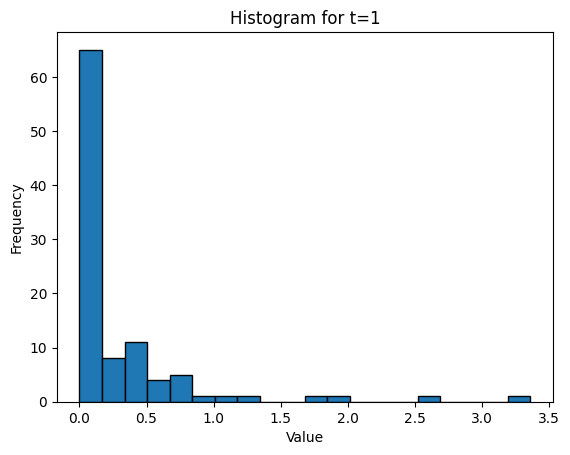

t=10: mean=3.320, std=1.767, p=0.000


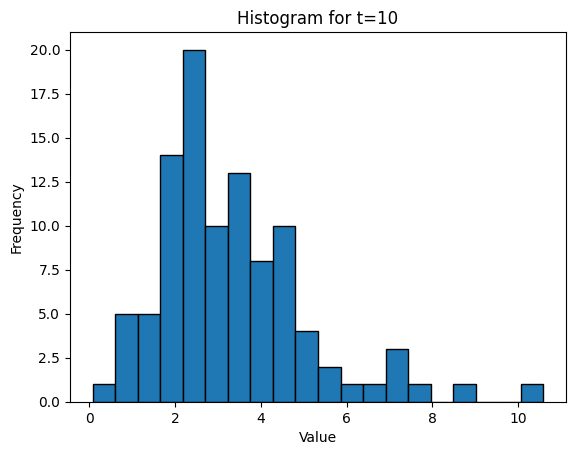

t=30: mean=10.508, std=3.915, p=0.000


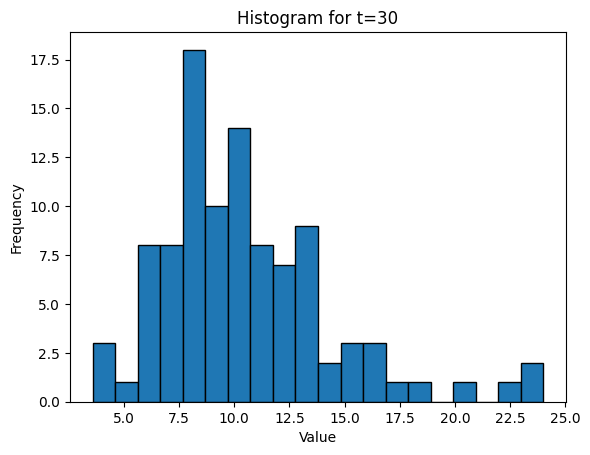

t=60: mean=19.781, std=4.346, p=0.284


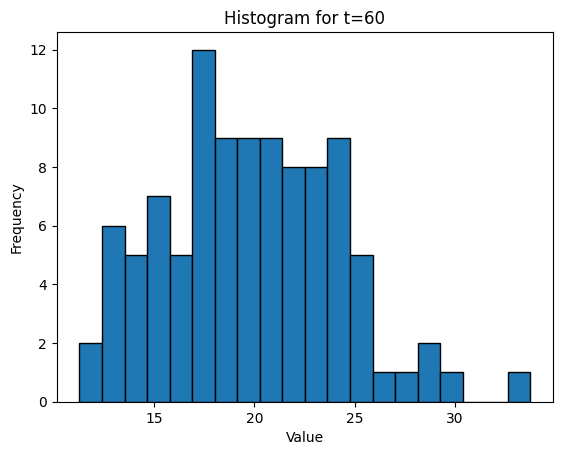

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Параметри
k_shape = 0.3
theta_scale = 1.1
n = 100
t_max = 60
rng = np.random.default_rng(42)

def simulate_sum_gamma_t(t, n):
    increments = rng.gamma(shape=k_shape, scale=theta_scale, size=(n, t))
    return increments.sum(axis=1)

# Симуляції для t = 1..60
ts = range(1, t_max + 1)
samples_by_t = {t: simulate_sum_gamma_t(t, n) for t in ts}

# Перевірка нормальності і вивід результатів
for t in [1, 10, 30, 60]:
    sample = samples_by_t[t]
    stat, pval = normaltest(sample)
    print(f"t={t}: mean={np.mean(sample):.3f}, std={np.std(sample, ddof=1):.3f}, p={pval:.3f}")

    plt.hist(sample, bins=20, edgecolor="black")
    plt.title(f"Histogram for t={t}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd



# результати для всіх t
rows = []
for t in range(1, t_max + 1):
    sample = simulate_sum_gamma_t(t, n)
    stat, pval = normaltest(sample)
    mean, std = np.mean(sample), np.std(sample, ddof=1)
    theo_mean = k_shape * t * theta_scale
    theo_std = np.sqrt(k_shape * t) * theta_scale
    rows.append({
        "t": t,
        "mean": round(mean, 3),
        "std": round(std, 3),
        "normaltest_p": round(pval, 3),
        "theoretical_mean": round(theo_mean, 3),
        "theoretical_std": round(theo_std, 3)
    })

df_results = pd.DataFrame(rows)
print(df_results.to_string(index=False))


 t   mean   std  normaltest_p  theoretical_mean  theoretical_std
 1  0.446 0.789         0.000              0.33            0.602
 2  0.731 0.874         0.000              0.66            0.852
 3  0.963 1.133         0.000              0.99            1.044
 4  1.650 1.496         0.000              1.32            1.205
 5  1.779 1.451         0.000              1.65            1.347
 6  1.917 1.139         0.006              1.98            1.476
 7  2.408 1.369         0.033              2.31            1.594
 8  2.514 1.674         0.000              2.64            1.704
 9  3.077 1.819         0.000              2.97            1.807
10  3.034 1.719         0.000              3.30            1.905
11  3.701 2.171         0.000              3.63            1.998
12  4.119 2.267         0.005              3.96            2.087
13  4.282 2.533         0.000              4.29            2.172
14  4.506 2.179         0.003              4.62            2.254
15  4.578 1.925         0

# Висновок


При малих
t
t сума приростів має розподіл, далекий від нормального (через асиметрію гамма-розподілу).

Із ростом
t
t, завдяки Центральній Граничній Теоремі, розподіл суми
S
t
S
t
​
  наближається до нормального.

Теоретичні середні та дисперсії добре узгоджуються з емпіричними результатами симуляцій.



Завдання 2

Завантаж набір даних Product Advertising Data (посилання на диск). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.



Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

АНАЛІЗ ДАНИХ PRODUCT ADVERTISING

📊 Завантажено датасет розміром: 300 рядків × 7 стовпців

📋 Стовпці в датасеті:
   1. TV
   2. Billboards
   3. Google_Ads
   4. Social_Media
   5. Influencer_Marketing
   6. Affiliate_Marketing
   7. Product_Sold

🔍 Перевірка на пропущені значення:
   Пропущених значень немає ✓

СТАТИСТИЧНИЙ АНАЛІЗ ПОКАЗНИКІВ

📈 Аналіз показника: TV
----------------------------------------
  • Середнє значення: 517.4310
  • Дисперсія: 83010.1336
  • Стандартне відхилення: 288.1148
  • Медіана: 513.9700
  • Мінімум: 1.0400
  • Максимум: 998.1000
  • Кореляція з Product_Sold: 0.3742
  • Тест Shapiro-Wilk: статистика=0.9549, p-value=0.0000 → ✗ НЕ нормальний

📈 Аналіз показника: Billboards
----------------------------------------
  • Середнє значення: 502.6449
  • Дисперсія: 76089.0127
  • Стандартне відхилення: 275.8424
  • Медіана: 533.0200
  • Мінімум: 3.6300
  • Максимум: 995.3200
  • Кореляція з Product_Sold: 0.4806
  • Тест Shapiro-Wilk: статистика=0.9576, p-value=0.

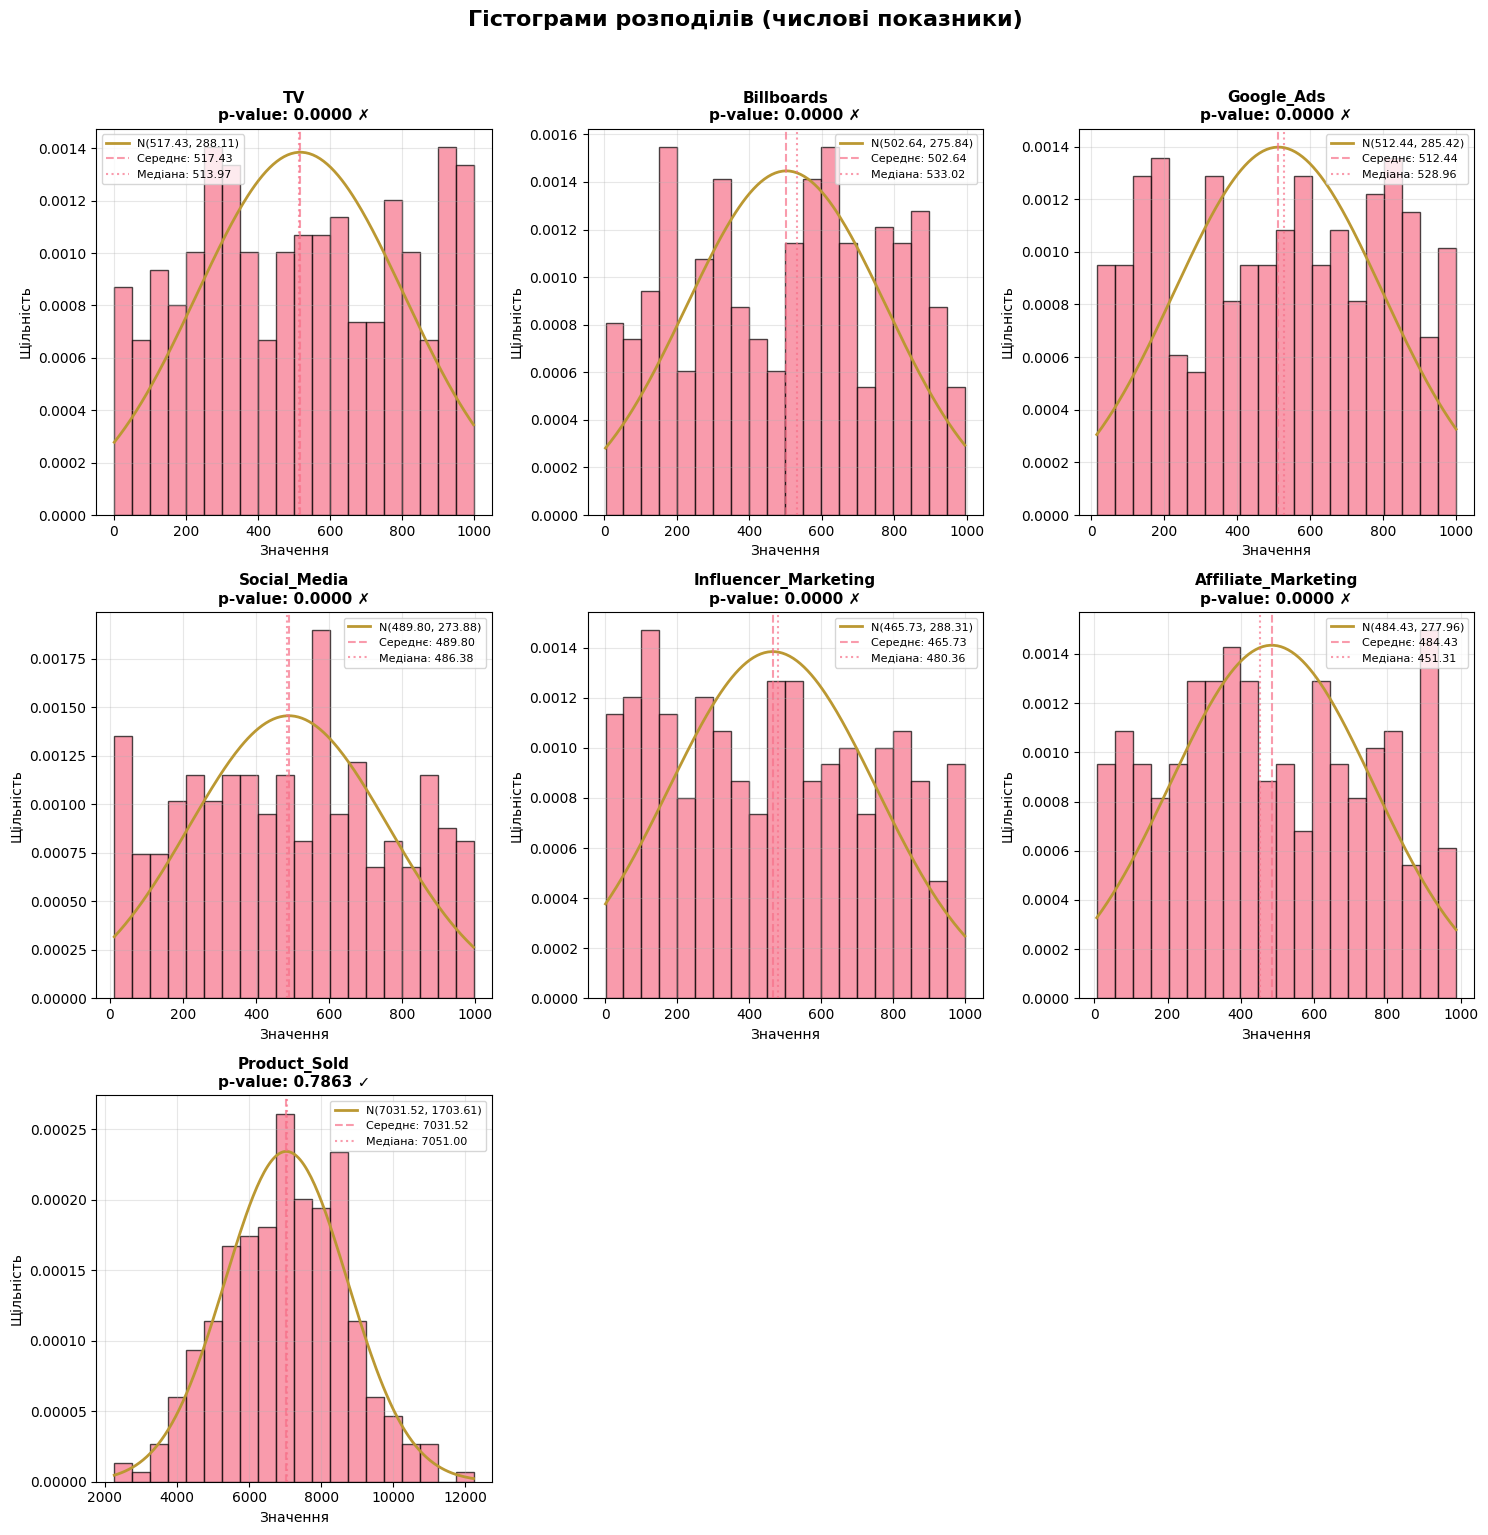


КОРЕЛЯЦІЙНИЙ АНАЛІЗ

📊 Кореляція рекламних каналів з Product_Sold (тільки числові):
   (відсортовано за силою зв'язку)

      Рекламний канал  Кореляція  Абс. кореляція Сила зв'язку
 Affiliate_Marketing     0.6116          0.6116     Помірний
          Billboards     0.4806          0.4806     Помірний
        Social_Media     0.4011          0.4011     Помірний
                  TV     0.3742          0.3742     Помірний
          Google_Ads     0.2037          0.2037      Слабкий
Influencer_Marketing     0.1408          0.1408      Слабкий


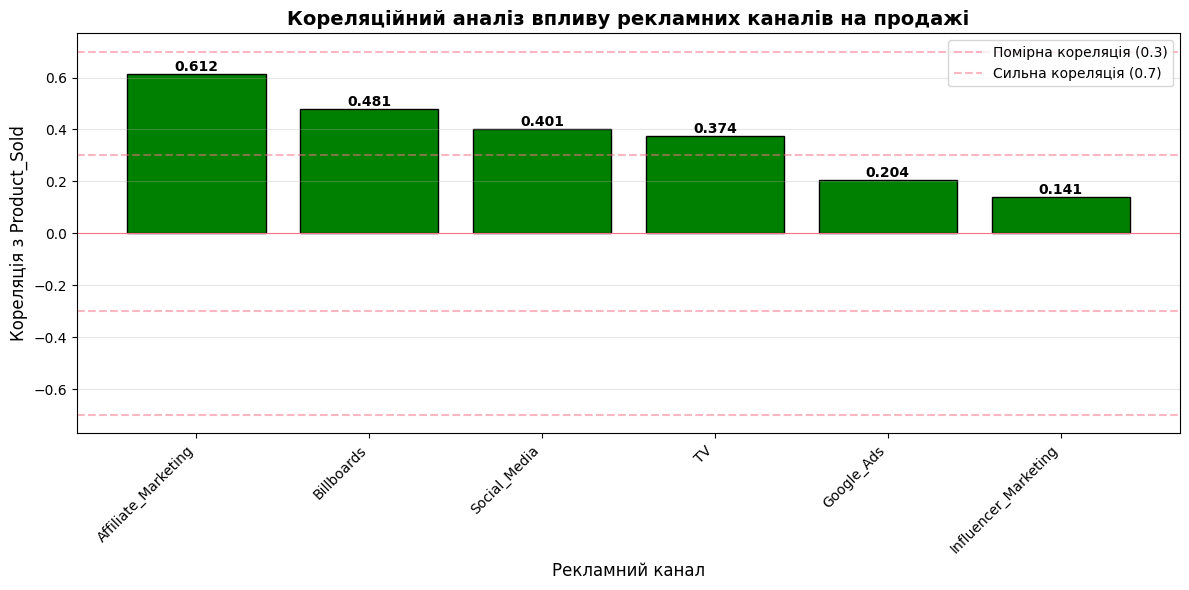


📊 Побудова матриці кореляцій (числові колонки)...


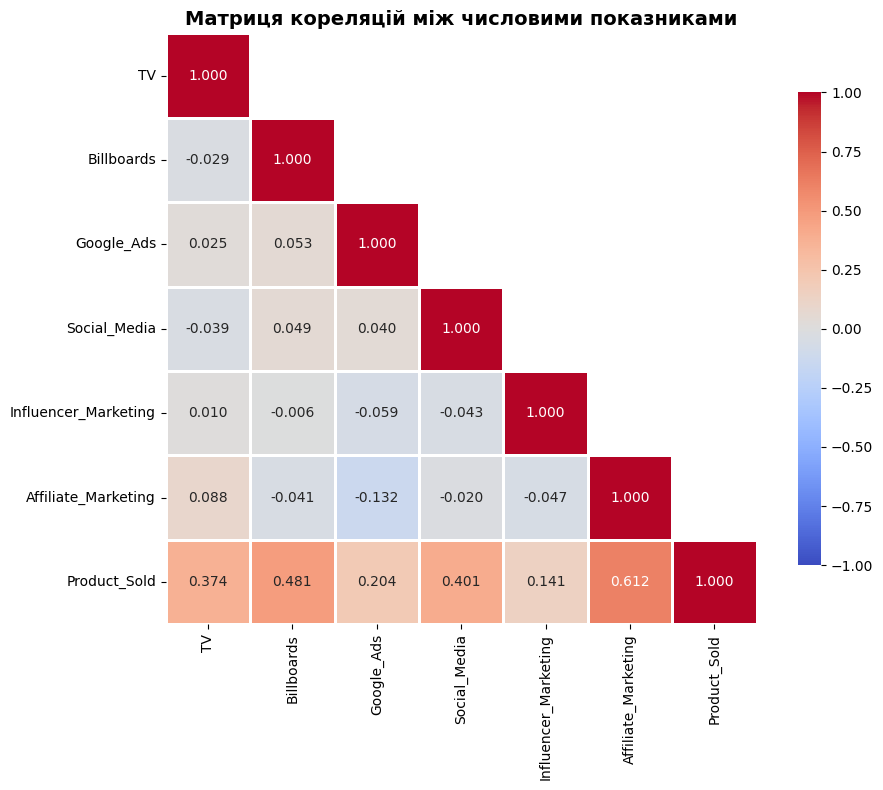


📊 Побудова Q-Q графіків для перевірки нормальності (числові)...


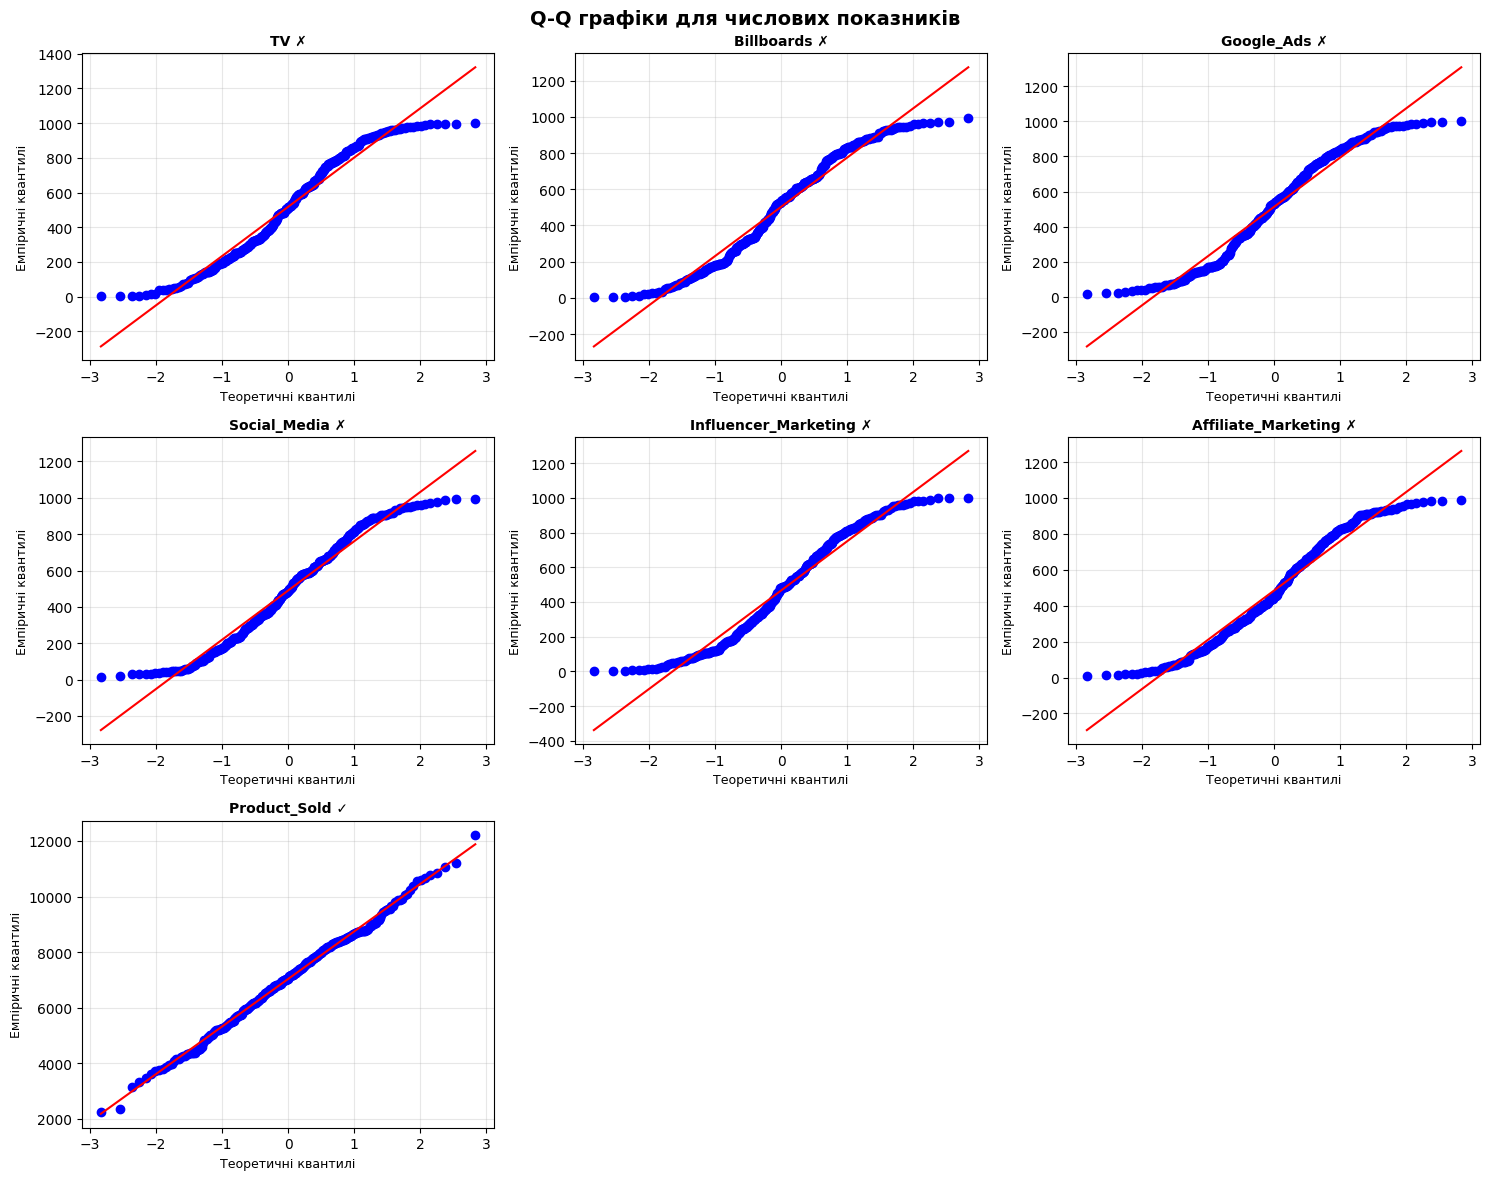


АНАЛІЗ НАЙВПЛИВОВІШИХ РЕКЛАМНИХ КАНАЛІВ

🏆 ТОП-3 найвпливовіші рекламні канали:
   1. Affiliate_Marketing: кореляція = 0.6116 (Помірний)
   2. Billboards: кореляція = 0.4806 (Помірний)
   3. Social_Media: кореляція = 0.4011 (Помірний)

📉 Найменш впливові рекламні канали:
   1. Google_Ads: кореляція = 0.2037 (Слабкий)
   2. Influencer_Marketing: кореляція = 0.1408 (Слабкий)

ФІНАЛЬНІ ВИСНОВКИ

📊 Підсумки аналізу даних Product Advertising:

1. СТАТИСТИЧНИЙ АНАЛІЗ:
   ✓ Розраховано базові статистики для кожного показника
   ✓ Оброблено нечислові/константні колонки без збоїв

2. ПЕРЕВІРКА НА НОРМАЛЬНІСТЬ:
   • Для n ≤ 5000 використано Shapiro-Wilk, для більших вибірок — D’Agostino-Pearson
   • Побудовано гістограми з нормальними кривими (де це коректно)
   • Додано Q-Q графіки (до 9 числових колонок)

   • Кількість показників з нормальним розподілом: 1/7

3. КОРЕЛЯЦІЙНИЙ АНАЛІЗ:
   ✓ Розраховано кореляції всіх числових рекламних каналів із ціллю
   ✓ Визначено силу зв'язків (слабкий/помі

In [1]:
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, normaltest
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning)

# ──────────────────────────────────────────────────────────────────────────────
# НАЛАШТУВАННЯ СТИЛЮ (залишено як у тебе)
plt.style.use('default')
sns.set_palette("husl")

# ──────────────────────────────────────────────────────────────────────────────
# УТИЛІТИ

def safe_read_gsheet_csv(edit_url: str) -> pd.DataFrame:
    """Завантажує CSV з Google Sheets edit-URL; кидає зрозумілу помилку."""
    if "/edit" in edit_url:
        csv_url = edit_url[:edit_url.find('/edit')] + '/export?format=csv'
    else:
        # якщо вже дадуть /export?format=csv
        csv_url = edit_url
    try:
        df = pd.read_csv(csv_url)
    except Exception as e:
        print(" Помилка завантаження даних із Google Sheets:", file=sys.stderr)
        print(str(e), file=sys.stderr)
        raise
    return df

def numeric_columns(df: pd.DataFrame) -> list:
    """Повертає лише числові колонки (float, int, bool→int)."""
    # bool переводимо до int, щоб не ламати кореляції
    for c in df.columns:
        if df[c].dtype == bool:
            df[c] = df[c].astype(int)
    return list(df.select_dtypes(include=[np.number]).columns)

def shapiro_or_normaltest(x: pd.Series):
    """
    Shapiro-Wilk коректний для n ∈ [3, 5000].
    Для великих вибірок застосовуємо D’Agostino-Pearson (normaltest).
    Повертає (stat, pvalue, method).
    """
    x = x.dropna().astype(float)
    n = len(x)
    if n < 3:
        return (np.nan, np.nan, "insufficient_n")
    if n <= 5000:
        stat, p = shapiro(x)
        return (stat, p, "shapiro")
    else:
        stat, p = normaltest(x)
        return (stat, p, "normaltest")

def safe_corr(a: pd.Series, b: pd.Series) -> float:
    """Кореляція Пірсона з ігнором NaN; якщо нечислове/константне — np.nan."""
    try:
        a = pd.to_numeric(a, errors="coerce")
        b = pd.to_numeric(b, errors="coerce")
        if a.nunique(dropna=True) < 2 or b.nunique(dropna=True) < 2:
            return np.nan
        return a.corr(b)
    except Exception:
        return np.nan

def strength_label(r_abs: float) -> str:
    if pd.isna(r_abs):
        return "Н/Д"
    if r_abs > 0.7:
        return "Сильний"
    if r_abs > 0.3:
        return "Помірний"
    return "Слабкий"

# ──────────────────────────────────────────────────────────────────────────────
# ЗАВАНТАЖЕННЯ ДАНИХ
print("=" * 80)
print("АНАЛІЗ ДАНИХ PRODUCT ADVERTISING")
print("=" * 80)

url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094'
df = safe_read_gsheet_csv(url)

print(f"\n Завантажено датасет розміром: {df.shape[0]} рядків × {df.shape[1]} стовпців")
print("\n📋 Стовпці в датасеті:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# Пропуски
print(f"\n🔍 Перевірка на пропущені значення:")
missing = df.isnull().sum()
if (missing > 0).any():
    print(missing[missing > 0])
else:
    print("   Пропущених значень немає ✓")

# ──────────────────────────────────────────────────────────────────────────────
# СТАТИСТИЧНИЙ АНАЛІЗ
print("\n" + "=" * 80)
print("СТАТИСТИЧНИЙ АНАЛІЗ ПОКАЗНИКІВ")
print("=" * 80)

num_cols = numeric_columns(df)
if not num_cols:
    print(" В датасеті немає числових стовпців — аналіз неможливий.")
    sys.exit(0)

if 'Product_Sold' not in df.columns:
    print(" Стовпця 'Product_Sold' немає. Кореляції з ним обчислити неможливо.")
    target = None
else:
    target = 'Product_Sold'
    if target not in num_cols:
        # Якщо Product_Sold нечисловий — спробуємо привести
        df[target] = pd.to_numeric(df[target], errors="coerce")
        if df[target].notna().sum() == 0:
            print(" 'Product_Sold' не вдалося перетворити до числового формату.")
            target = None
        else:
            if target not in num_cols:
                num_cols.append(target)

stats_results = []

for col in df.columns:
    print(f"\n📈 Аналіз показника: {col}")
    print("-" * 40)

    s = df[col]
    s_num = pd.to_numeric(s, errors="coerce")

    mean_val     = float(np.nanmean(s_num))
    variance_val = float(np.nanvar(s_num, ddof=1)) if s_num.notna().sum() > 1 else np.nan
    std_val      = float(np.nanstd(s_num, ddof=1)) if s_num.notna().sum() > 1 else np.nan
    median_val   = float(np.nanmedian(s_num))
    min_val      = float(np.nanmin(s_num)) if s_num.notna().any() else np.nan
    max_val      = float(np.nanmax(s_num)) if s_num.notna().any() else np.nan

    print(f"  • Середнє значення: {mean_val:.4f}")
    print(f"  • Дисперсія: {variance_val:.4f}" if not np.isnan(variance_val) else "  • Дисперсія: Н/Д")
    print(f"  • Стандартне відхилення: {std_val:.4f}" if not np.isnan(std_val) else "  • Стандартне відхилення: Н/Д")
    print(f"  • Медіана: {median_val:.4f}")
    print(f"  • Мінімум: {min_val:.4f}" if not np.isnan(min_val) else "  • Мінімум: Н/Д")
    print(f"  • Максимум: {max_val:.4f}" if not np.isnan(max_val) else "  • Максимум: Н/Д")

    if target and col != target:
        correlation = safe_corr(s, df[target])
        print(f"  • Кореляція з {target}: {correlation:.4f}" if not pd.isna(correlation) else f"  • Кореляція з {target}: Н/Д")
    else:
        correlation = 1.0 if target and col == target else np.nan
        if target and col == target:
            print(f"  • Кореляція з {target}: 1.0000 (сам з собою)")
        elif target is None:
            print("  • Кореляція: Н/Д (немає цільового стовпця)")

    # Тест на нормальність — тільки для числових і коли не константа
    if pd.api.types.is_numeric_dtype(s_num) and s_num.dropna().nunique() >= 3:
        stat_n, p_n, method = shapiro_or_normaltest(s_num)
        is_normal = (p_n > 0.05) if pd.notna(p_n) else False
        method_label = "Shapiro-Wilk" if method == "shapiro" else ("D’Agostino-Pearson" if method == "normaltest" else "—")
        if pd.notna(p_n):
            print(f"  • Тест {method_label}: статистика={stat_n:.4f}, p-value={p_n:.4f} → {'✓ Нормальний' if is_normal else '✗ НЕ нормальний'}")
        else:
            print(f"  • Тест на нормальність: неможливо (недостатньо даних)")
    else:
        p_n = np.nan
        is_normal = False
        print("  • Тест на нормальність: пропущено (нечисловий/константний/замало точок)")

    stats_results.append({
        'Показник': col,
        'Середнє': mean_val,
        'Дисперсія': variance_val,
        'Ст. відхилення': std_val,
        'Медіана': median_val,
        'Мінімум': min_val,
        'Максимум': max_val,
        f'Кореляція з {target}' if target else 'Кореляція (Н/Д)': correlation if col != target else np.nan,
        'p-value (нормальність)': p_n,
        'Нормальність': 'Так' if (pd.notna(p_n) and p_n > 0.05) else 'Ні'
    })

stats_df = pd.DataFrame(stats_results)

print("\n" + "=" * 80)
print("ЗВЕДЕНА ТАБЛИЦЯ СТАТИСТИК")
print("=" * 80)
with pd.option_context('display.float_format', '{:.4f}'.format):
    print("\n", stats_df.to_string(index=False))

# ──────────────────────────────────────────────────────────────────────────────
# ГІСТОГРАМИ ДЛЯ ЧИСЛОВИХ КОЛОНОК
print("\n" + "=" * 80)
print("ПОБУДОВА ГІСТОГРАМ РОЗПОДІЛІВ (тільки числові)")
print("=" * 80)

plot_cols = [c for c in num_cols]  # тільки числові
n_cols = len(plot_cols)
if n_cols > 0:
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = np.array(axes).reshape(1, -1)
    axes = axes.flatten()

    for idx, col in enumerate(plot_cols):
        ax = axes[idx]
        data = pd.to_numeric(df[col], errors="coerce").dropna()

        if len(data) == 0:
            ax.set_visible(False)
            continue

        # Якщо константа — змоделюємо вузький бін
        if data.nunique() == 1:
            ax.hist(data, bins=3, density=True, alpha=0.7, edgecolor='black', linewidth=1)
            mean = data.iloc[0]
            std = 0.0
        else:
            ax.hist(data, bins=20, density=True, alpha=0.7, edgecolor='black', linewidth=1)
            mean = data.mean()
            std = data.std(ddof=1)

        # Нормальна крива (якщо std > 0)
        if std > 0:
            x_range = np.linspace(data.min(), data.max(), 200)
            normal_curve = stats.norm.pdf(x_range, mean, std)
            ax.plot(x_range, normal_curve, linewidth=2, label=f'N({mean:.2f}, {std:.2f})')

        # Вертикальні лінії
        ax.axvline(mean, linestyle='--', alpha=0.7, label=f'Середнє: {mean:.2f}')
        ax.axvline(np.median(data), linestyle=':', alpha=0.7, label=f'Медіана: {np.median(data):.2f}')

        # p-value
        _, p_value, _ = shapiro_or_normaltest(data)
        normality_symbol = "✓" if (pd.notna(p_value) and p_value > 0.05) else "✗"

        ax.set_title(f'{col}\np-value: {p_value:.4f} {normality_symbol}' if pd.notna(p_value) else f'{col}\np-value: Н/Д',
                     fontsize=11, fontweight='bold')
        ax.set_xlabel('Значення', fontsize=10)
        ax.set_ylabel('Щільність', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

    for idx in range(len(plot_cols), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle('Гістограми розподілів (числові показники)', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Немає числових колонок для побудови гістограм.")

# ──────────────────────────────────────────────────────────────────────────────
# КОРЕЛЯЦІЙНИЙ АНАЛІЗ І БАР-ЧАРТ
print("\n" + "=" * 80)
print("КОРЕЛЯЦІЙНИЙ АНАЛІЗ")
print("=" * 80)

if target:
    advertising_columns = [col for col in num_cols if col != target]
    correlations = []
    for col in advertising_columns:
        r = safe_corr(df[col], df[target])
        correlations.append({
            'Рекламний канал': col,
            'Кореляція': r,
            'Абс. кореляція': abs(r) if pd.notna(r) else np.nan,
            "Сила зв'язку": strength_label(abs(r) if pd.notna(r) else np.nan)
        })

    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('Абс. кореляція', ascending=False, na_position='last')

    print("\n Кореляція рекламних каналів з Product_Sold (тільки числові):")
    print("   (відсортовано за силою зв'язку)")
    with pd.option_context('display.float_format', '{:.4f}'.format):
        print("\n", corr_df.to_string(index=False))

    # Візуалізація
    if not corr_df.empty and corr_df['Кореляція'].notna().any():
        plt.figure(figsize=(12, 6))
        vals = corr_df['Кореляція'].fillna(0.0).values
        colors = ['green' if x > 0 else 'red' for x in vals]
        bars = plt.bar(range(len(corr_df)), vals, edgecolor='black', linewidth=1)

        # Додаємо значення
        for i, (bar, val) in enumerate(zip(bars, vals)):
            plt.text(bar.get_x() + bar.get_width()/2, val,
                     f'{val:.3f}', ha='center',
                     va='bottom' if val >= 0 else 'top',
                     fontsize=10, fontweight='bold')
            bar.set_facecolor(colors[i])

        plt.xticks(range(len(corr_df)), corr_df['Рекламний канал'], rotation=45, ha='right')
        plt.xlabel('Рекламний канал', fontsize=12)
        plt.ylabel(f'Кореляція з {target}', fontsize=12)
        plt.title('Кореляційний аналіз впливу рекламних каналів на продажі', fontsize=14, fontweight='bold')
        plt.axhline(y=0, linewidth=0.8)
        plt.axhline(y=0.3, linestyle='--', alpha=0.5, label='Помірна кореляція (0.3)')
        plt.axhline(y=-0.3, linestyle='--', alpha=0.5)
        plt.axhline(y=0.7, linestyle='--', alpha=0.5, label='Сильна кореляція (0.7)')
        plt.axhline(y=-0.7, linestyle='--', alpha=0.5)
        plt.legend(loc='upper right')
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    corr_df = pd.DataFrame()
    print(" Кореляційний аналіз пропущено — немає Product_Sold або він нечисловий.")

# ──────────────────────────────────────────────────────────────────────────────
# МАТРИЦЯ КОРЕЛЯЦІЙ (лише числові)
print("\n📊 Побудова матриці кореляцій (числові колонки)...")
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 8))
    corr_mat = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr_mat, dtype=bool), k=1)
    sns.heatmap(corr_mat, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, mask=mask)
    plt.title('Матриця кореляцій між числовими показниками', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(" Замало числових колонок для матриці кореляцій.")

# ──────────────────────────────────────────────────────────────────────────────
# Q-Q PLOTS (до 9 числових колонок)
print("\n📊 Побудова Q-Q графіків для перевірки нормальності (числові)...")
qq_cols = num_cols[:9]
if qq_cols:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    for idx, col in enumerate(qq_cols):
        ax = axes[idx]
        data = pd.to_numeric(df[col], errors="coerce").dropna()
        if len(data) >= 3:
            stats.probplot(data, dist="norm", plot=ax)
            _, p_value, _ = shapiro_or_normaltest(data)
            normality_symbol = "✓" if (pd.notna(p_value) and p_value > 0.05) else "✗"
            ax.set_title(f'{col} {normality_symbol}', fontsize=10, fontweight='bold')
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('Теоретичні квантилі', fontsize=9)
            ax.set_ylabel('Емпіричні квантилі', fontsize=9)
        else:
            ax.text(0.5, 0.5, f'{col}\n(замало даних)', ha='center', va='center', fontsize=10)
            ax.axis('off')
    for idx in range(len(qq_cols), 9):
        axes[idx].set_visible(False)
    plt.suptitle('Q-Q графіки для числових показників', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(" Немає числових колонок для Q-Q графіків.")

# ──────────────────────────────────────────────────────────────────────────────
# ТОП/БІЛЬШ НАЙМЕНШ ВПЛИВОВІ КАНАЛИ
print("\n" + "=" * 80)
print("АНАЛІЗ НАЙВПЛИВОВІШИХ РЕКЛАМНИХ КАНАЛІВ")
print("=" * 80)

if target and not corr_df.empty and corr_df['Абс. кореляція'].notna().any():
    corr_df_nonan = corr_df.dropna(subset=['Абс. кореляція'])
    top_channels = corr_df_nonan.head(3)
    bottom_channels = corr_df_nonan.tail(2)

    print("\n ТОП-3 найвпливовіші рекламні канали:")
    for i, row in enumerate(top_channels.itertuples(index=False), 1):
        print(f"   {i}. {row[0]}: кореляція = {row[1]:.4f} ({row[3]})")

    print("\n📉 Найменш впливові рекламні канали:")
    for i, row in enumerate(bottom_channels.itertuples(index=False), 1):
        print(f"   {i}. {row[0]}: кореляція = {row[1]:.4f} ({row[3]})")
else:
    print(" Недостатньо даних для визначення ТОП/найменш впливових каналів.")

# ──────────────────────────────────────────────────────────────────────────────
# ФІНАЛЬНІ ВИСНОВКИ
print("\n" + "=" * 80)
print("ФІНАЛЬНІ ВИСНОВКИ")
print("=" * 80)

print("""
 Підсумки аналізу даних Product Advertising:

1. СТАТИСТИЧНИЙ АНАЛІЗ:
   ✓ Розраховано базові статистики для кожного показника
   ✓ Оброблено нечислові/константні колонки без збоїв

2. ПЕРЕВІРКА НА НОРМАЛЬНІСТЬ:
   • Для n ≤ 5000 використано Shapiro-Wilk, для більших вибірок — D’Agostino-Pearson
   • Побудовано гістограми з нормальними кривими (де це коректно)
   • Додано Q-Q графіки (до 9 числових колонок)
""")

normal_count = sum(1 for p in stats_results if p['Нормальність'] == 'Так')
total_count = len(stats_results)
print(f"   • Кількість показників з нормальним розподілом: {normal_count}/{total_count}")

print("""
3. КОРЕЛЯЦІЙНИЙ АНАЛІЗ:
   ✓ Розраховано кореляції всіх числових рекламних каналів із ціллю
   ✓ Визначено силу зв'язків (слабкий/помірний/сильний)
   ✓ Побудовано матрицю кореляцій
""")

if target and not corr_df.empty and corr_df['Абс. кореляція'].notna().any():
    top_row = corr_df.dropna(subset=['Абс. кореляція']).iloc[0]
    print(f"   • Найвпливовіший канал: {top_row['Рекламний канал']} (r = {top_row['Кореляція']:.4f})")
else:
    print("   • Найвпливовіший канал: Н/Д")

print("=" * 80)
